In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ 7.55154802, -3.9753365 ],
       [ 7.19754725, -3.29162438],
       [ 7.01235103, -5.66090174],
       ...,
       [-8.63097954,  0.2638812 ],
       [ 6.11751132, -3.69092381],
       [ 9.61359866, -2.0227575 ]])

In [5]:
y

array([2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1,
       2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0,

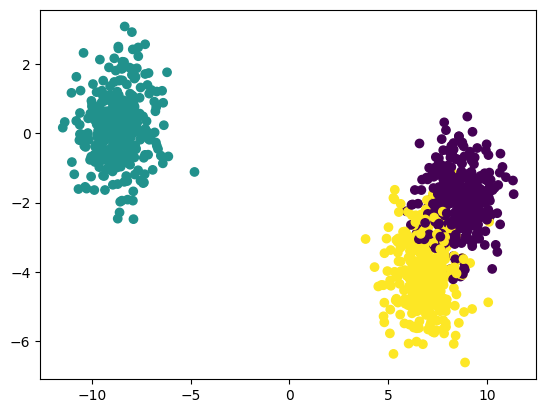

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0,
 299.6978915260901,
 141.3148597747302,
 105.94978075311664,
 94.136226515196,
 56.867230156331715,
 49.99842776166914,
 41.974083412935904,
 33.18435369563237,
 31.012486940379937]

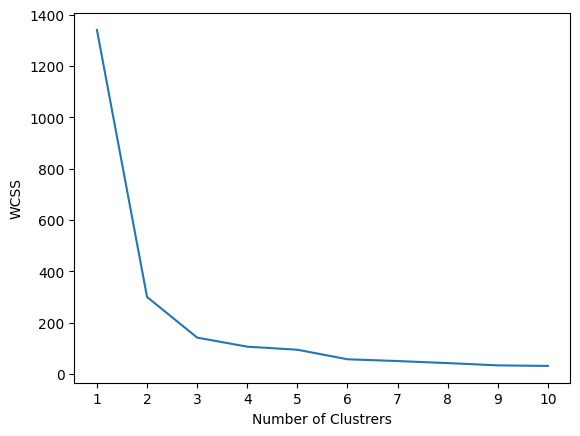

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2,

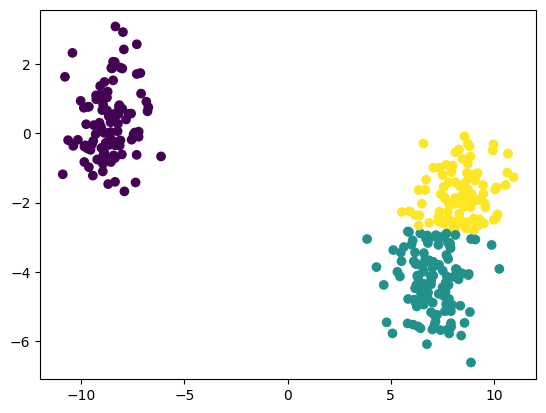

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.712137726983626,
 0.6119085746749195,
 0.5687928527790387,
 0.48802220860383144,
 0.47068259693600417,
 0.4334616057986141,
 0.4385940919373506,
 0.4104393387500302,
 0.38449482811829]

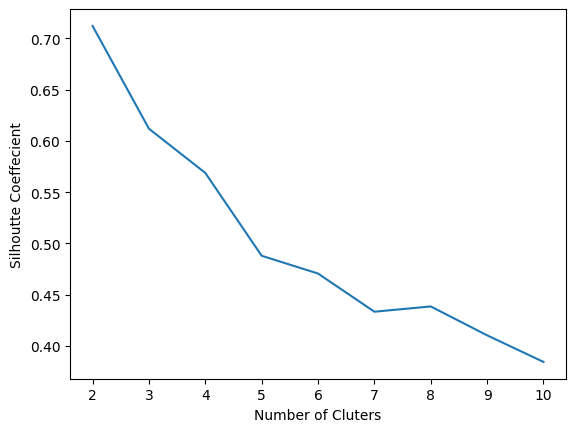

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()